# **Import the data from CCLE into a new Google Colab file**

Name: Jie Hou

Uid: 005643341

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ441B/insurance.csv")

In [ ]:
df.loc[df["sex"] == "female","sex"] = 1.
df.loc[df["sex"] == "male","sex"] = 0.

### CONVERT smoker and region.
# smoker
df.loc[df['smoker'] == 'yes', 'smoker'] = 1 
df.loc[df['smoker'] == 'no', 'smoker'] = 0

# region
df = df.merge(pd.get_dummies(df.region), left_index = True, right_index = True)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,1.0,27.900,0,1,southwest,16884.92400,0,0,0,1
1,18,0.0,33.770,1,0,southeast,1725.55230,0,0,1,0
2,28,0.0,33.000,3,0,southeast,4449.46200,0,0,1,0
3,33,0.0,22.705,0,0,northwest,21984.47061,0,1,0,0
4,32,0.0,28.880,0,0,northwest,3866.85520,0,1,0,0


# **Split the data into 80/20, in/out sample**

In [ ]:
import numpy as np

In [ ]:
col = ["age", "sex", "bmi", "children", "smoker", "northeast", "northwest", "southeast"]
sub = df[col]
data = np.array(sub)
target = np.array(df.loc[:, "charges"])

In [ ]:
display(data)

array([[19, 1.0, 27.9, ..., 0, 0, 0],
       [18, 0.0, 33.77, ..., 0, 0, 1],
       [28, 0.0, 33.0, ..., 0, 0, 1],
       ...,
       [18, 1.0, 36.85, ..., 0, 0, 1],
       [21, 1.0, 25.8, ..., 0, 0, 0],
       [61, 1.0, 29.07, ..., 0, 1, 0]], dtype=object)

In [ ]:
display(target)

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [ ]:
cut = int((len(data) * .8) // 1)

In [ ]:
in_data = data[:cut]
out_data = data[cut:]

in_target = target[:cut]
out_target = target[cut:]

# **Normalize the Data**

In [ ]:
from sklearn import preprocessing

In [ ]:
scaler = preprocessing.StandardScaler().fit(in_data)
in_data_scale = scaler.transform(in_data)

out_data_scale = scaler.transform(out_data)

# **Get lambda from Lasso cross validation**

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
modCV = LassoCV().fit(in_data_scale, in_target)

In [ ]:
# Optimized Lambda
a = modCV.alpha_ 
display(a)

133.34880015958146

# **Run a lasso regression with that Lambda**

In [ ]:
from sklearn.linear_model import Lasso
model = Lasso(alpha = a).fit(in_data_scale, in_target)
in_y_pred = model.predict(in_data_scale)
out_y_pred = model.predict(out_data_scale)

In [ ]:
model.coef_

array([3562.03175365,    0.        , 1885.28311102,  395.84571184,
       9328.60333931,  274.46349144,   59.97483399,   -0.        ])

# **Visualize the coefficients**

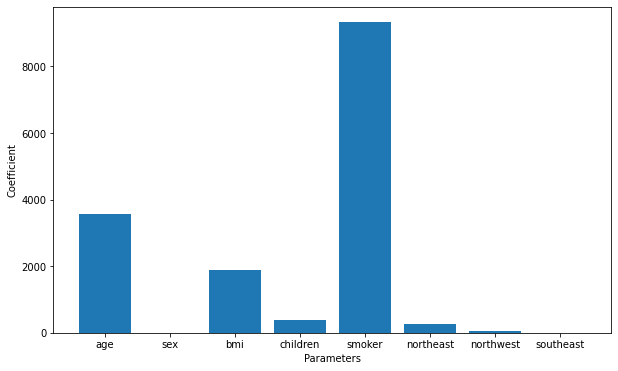

In [ ]:
plt.figure(figsize = (10, 6))
plt.bar(col, model.coef_)
plt.xlabel("Parameters")
plt.ylabel("Coefficient")
plt.show()

# **Interpret the coefficients**

From the plot, we can conclude that \
**1.** Age has significant influence on buying health insurance.\
**2.** Sex has no influence on buying health insurance.\
**3.** Bmi has significant influence on buying health insurance.\
**4.** The family with children intend to spend more on health insurance.\
**5.** Smoke habit has strong influence on spending health insurance.\
**6.** People live in northeast has more desire to buy health insurance compare to that in the southwest.

# **Compare in and out of sample MSE’s**

In [ ]:
from sklearn.metrics import mean_squared_error
out_sample_mse = mean_squared_error(out_y_pred, out_target)
in_sampe_mse = mean_squared_error(in_y_pred, in_target)

In [ ]:
display(in_sampe_mse, out_sample_mse)

36527611.75870688

37192393.85794109

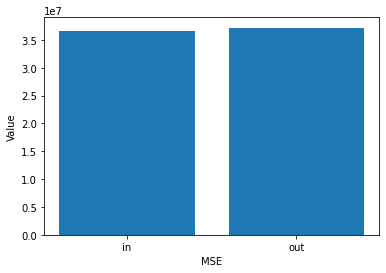

In [ ]:
plt.bar(["in", "out"], [in_sampe_mse, out_sample_mse])
plt.xlabel("MSE")
plt.ylabel("Value")
plt.show()